<a href="https://colab.research.google.com/github/PrabhatManna/Hotel-Data-analysis/blob/main/Data_Chronicle_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [8]:
#Improting all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Our DataSet**

In [10]:
#Uploading our csv file of Hotel Booking Analysis
dir_path='/content/drive/MyDrive/AlmaBetter/EDA-Capstone_Project1/Hotel Bookings.csv'

In [11]:
#Creating our Data frame by reading csv file
df=pd.read_csv(dir_path)

## **Understanding of data**

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [14]:
#Checking the shape of our data frame
df.shape

(119390, 32)

# So we know that in our dataframe total **119390 rows** and **32 columns** is present.

In [15]:
#Finding all the columns of our data frame and data type of each columns with the value they contain(Null/Non-Null)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Lets find all the columns with null values

In [16]:
df.isnull().sum().sort_values(ascending=False)[0:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

In [17]:
#Lets look at the columns which contain numeric data 
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Let's Understand meaning of our dataset columns

 0   **hotel**: tpye of hotel(Resort/City Hotel).                          
 1   **is_canceled**:Number of booking canceled.                    
 2   **lead_time**:The time taken between when a customer makes a reservation and their actual arrival.                      
 3   **arrival_date_year**: Year of arrival date.              
 4   **arrival_date_month**:Month of arrival date.              
 5   **arrival_date_week_number**Arrival date week number(out of 52 weeks in a year).      
 6   **arrival_date_day_of_month**:Day of arrival date.    
 7   **stays_in_weekend_nights**:Number of weekend nights (Saturday or Sunday) the guest stayed/booked to stay at the hotel.       
 8   **stays_in_week_nights**:Number of week nights ( From Monday to Friday) the guest stayed/booked to stay at the hotel.            
 9   **adults**:Number of adults.                   
 10  **children**:Number of chldren.                  
 11  **babies**:Number of babies.                        
 12  **meal**:Type of meal booked by guest.                        
 13  **country**:Country of origin.                      
 14  **market_segment**:Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.                  
 15  **distribution_channel**:Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.    
 16  **is_repeated_guest**:Value indicating if the booking name was from a repeated guest (1) or not (0).             
 17  **previous_cancellations**:Number of previous bookings that were cancelled by the customer prior to the current booking.        
 18  **previous_bookings_not_canceled **:Number of previous bookings not cancelled by the customer prior to the current booking. 
  
  19  **reserved_room_type**: Room type which was reserved during booking.              
 20  **assigned_room_type**:Actual room type which was assigned, it might be changed from reserved room type due to overbooking.              
 21  **booking_changes**:Total changes made in booking starting from  commencement of booking till checkin/cancellation.              
 22  **deposit_type**:Any deposit made for confirmation of booking.                  
 23  **agent **:Travel agency id.                        
 24  **company**:ID of the company that made the booking.                         
 25  **days_in_waiting_list**: number of days before confirmation of booking. Total days gap between the day when booking was entered in PMS to the day when booking was confirmed.                            
 26  **adr**(Average Daily Rate):indicate the average revenue earned for an occupied room on a given day.                           
 27  **required_car_parking_spaces**:Number of car parking spaces required by the customer.    
 28  **total_of_special_requests**:Special request made by customer on type of room that is Ac/Non-Ac and number of bed that is single/double bed.        
 29  **reservation_status**: Status of reservation like canceled,checkout etc.        
 30  **reservation_status_date**:Date of last reservation status.

# Data Cleaning

In [18]:
#Lets check the duplicate value in our data set
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [19]:
df[df.duplicated()].shape

(31994, 32)

As we know from above that in our dataset total 31994 duplicate value is present so we can drop them before proceeding further.

In [20]:
#Creating a copy of our original data set for the cleaning operation so that our original data set will not change and we can use it when required.

df1=df.copy()

Lets check our copied data frame by  looking at its shape.

In [21]:
df1.shape

(119390, 32)

In [22]:
df1[df1.duplicated()].shape

(31994, 32)

# Now lets drop the duplicate value from our copied dataset

In [23]:
df1.drop_duplicates(inplace=True)

In [24]:
print(f'Actual shape of our data is {df1.shape},with total rows: {len(df1)}, and total columns: {len(df1.columns)}')

Actual shape of our data is (87396, 32),with total rows: 87396, and total columns: 32


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [26]:
#Lets check the null values in our copied data frame
df1.isnull().sum().sort_values(ascending=False)[0:10]

company                   82137
agent                     12193
country                     452
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
dtype: int64

Analyzing the data containing null values with seaborn heat map 

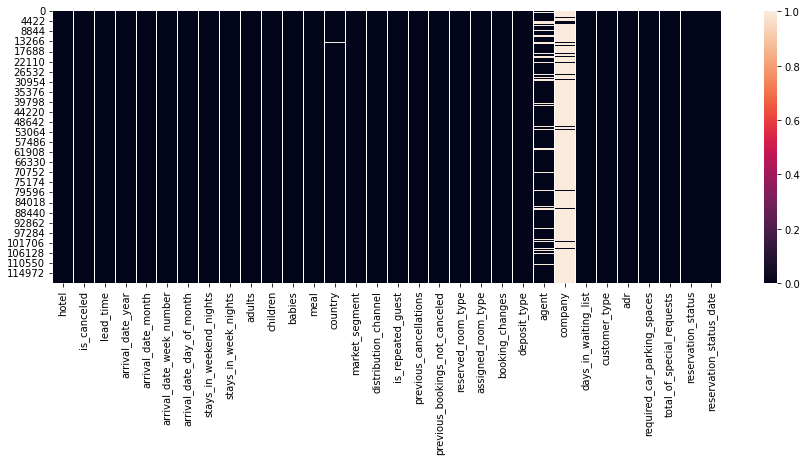

In [27]:
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(df.isnull(),linewidths=0,linecolor='red',cbar=True)

# Lets fill the null value with appropriate data type

In [28]:
#Droping the columns which have more than 50% missing values
df1.drop(['company'],inplace=True,axis=1)

In [29]:
df1.drop(['agent'],axis = 1,inplace = True)


In [30]:
df1['country']=df1['country'].fillna('other')

In [31]:
#filling children missing value with mean
df1['children'].fillna(round(df1.children.mean()), inplace=True)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

**Now verifying again to check the null value in dataset**

In [33]:
df1.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year           

**Excellent now there is no null values in our dataset**

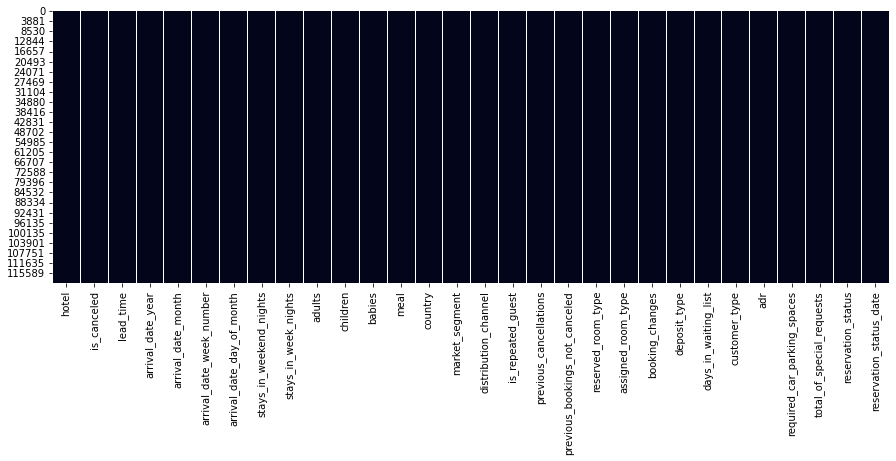

In [34]:
#Lets confirm it with seaborn heatmap
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(df1.isnull(),cbar=False)

In [35]:
#Adding a new column for total people per booking
df1['total_people_per_booking']=df1['adults']+df1['children']+df1['babies']

In [36]:
#checking whether any row contains 0 total guests per booking
df1[df1.total_people_per_booking==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people_per_booking
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,0.0
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-10-12,0.0
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,0.0
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,0.0
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,1,No Deposit,0,Transient,100.80,0,0,Check-Out,2017-06-30,0.0
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,0,No Deposit,0,Transient,0.00,1,1,Check-Out,2017-07-01,0.0
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,2,No Deposit,0,Transient,73.80,0,0,Check-Out,2017-07-17,0.0
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,0.0


**so there are rows containing zero guests which means the booking is not made/invalid.We will remove such rows**

In [37]:
df1.shape

(87396, 31)

In [38]:
#droping rows contain zero guest
df1=df1[df1.total_people_per_booking!=0]

In [39]:
df1.shape

(87230, 31)

In [40]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_people_per_booking
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.275238,79.971019,2016.210352,26.835091,15.815832,1.004609,2.623925,1.879365,0.138897,0.010845,0.038565,0.030402,0.184054,0.268497,0.746291,106.518031,0.084306,0.698934,2.029107
std,0.446637,86.058683,0.686064,13.669216,8.835545,1.027408,2.039830,0.621724,0.456265,0.113704,0.192556,0.369344,1.733033,0.710633,10.001001,54.891227,0.281659,0.832051,0.790141
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,1.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.200000,0.000000,0.000000,2.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000,55.000000


**Here we can see some outlier values(values in the columns which is very higher than mean). we will plot the outliers using boxplots and confine them in average value**

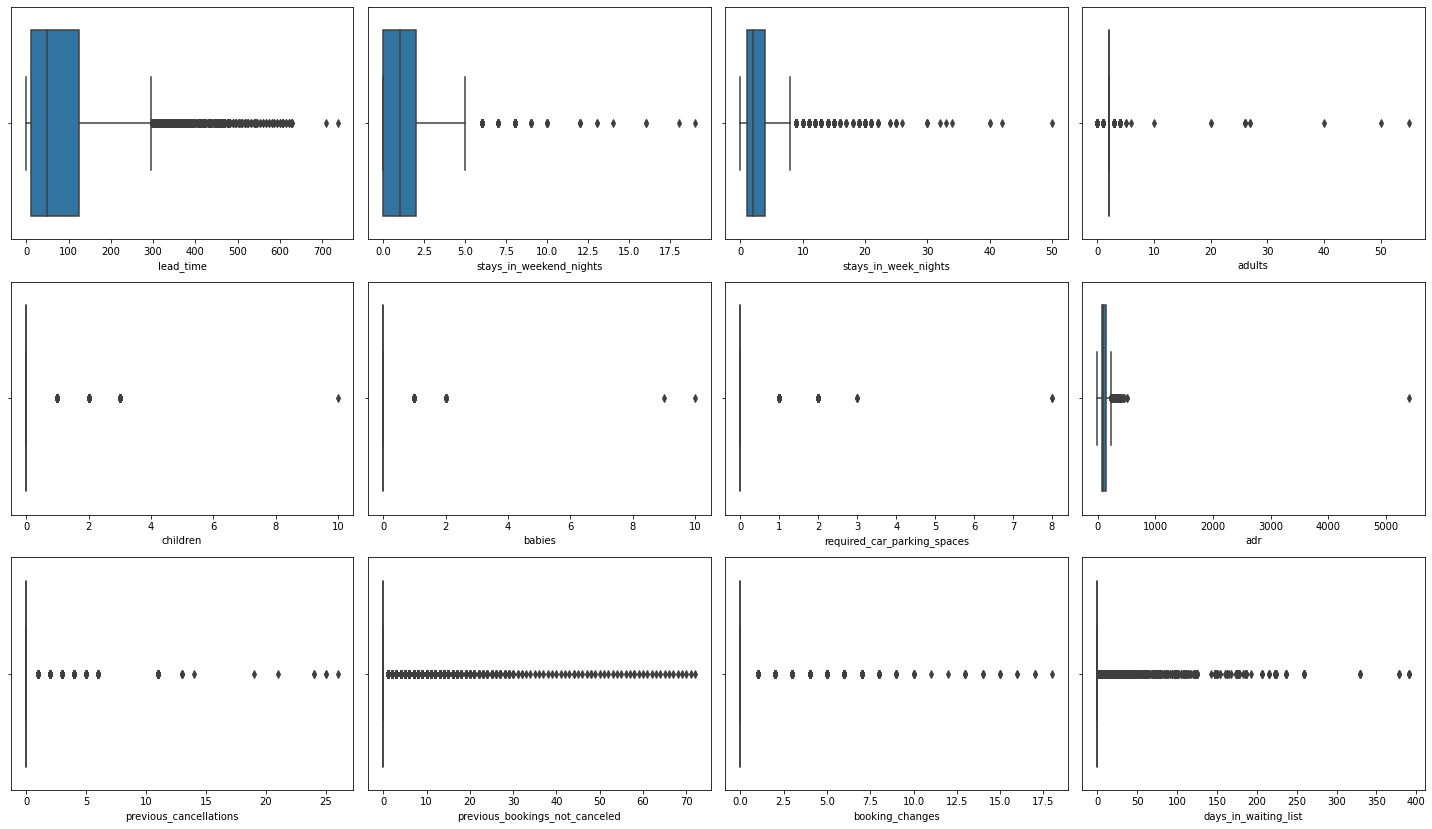

In [41]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes','days_in_waiting_list']
i= 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,i)
  i= i+1
  sns.boxplot(x=df1[column])
  plt.tight_layout()

In [42]:
df1[df1.days_in_waiting_list>250]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people_per_booking
50582,City Hotel,0,288,2016,May,19,5,0,3,2,...,0,No Deposit,259,Transient-Party,62.5,0,1,Check-Out,2016-05-08,2.0
50597,City Hotel,0,288,2016,May,19,5,0,3,2,...,0,No Deposit,259,Transient-Party,65.0,0,0,Check-Out,2016-05-08,2.0
50601,City Hotel,0,288,2016,May,19,5,0,3,3,...,1,No Deposit,259,Transient-Party,71.0,0,1,Check-Out,2016-05-08,3.0
50602,City Hotel,0,288,2016,May,19,5,0,3,2,...,0,No Deposit,259,Transient-Party,65.0,0,1,Check-Out,2016-05-08,2.0
50613,City Hotel,0,288,2016,May,19,5,0,3,2,...,0,No Deposit,259,Transient-Party,62.5,0,0,Check-Out,2016-05-08,2.0
50614,City Hotel,0,288,2016,May,19,5,0,3,2,...,0,No Deposit,259,Transient-Party,62.5,0,1,Check-Out,2016-05-08,2.0
50668,City Hotel,0,288,2016,May,19,5,0,3,2,...,0,No Deposit,259,Transient-Party,65.0,0,0,Check-Out,2016-05-08,2.0
50683,City Hotel,0,288,2016,May,19,5,0,3,2,...,0,No Deposit,259,Transient-Party,65.0,0,0,Check-Out,2016-05-08,2.0
50721,City Hotel,0,289,2016,May,19,6,0,2,2,...,1,No Deposit,259,Transient-Party,65.0,0,0,Check-Out,2016-05-08,2.0
56957,City Hotel,1,422,2016,September,38,16,0,2,2,...,0,No Deposit,379,Transient-Party,65.0,0,0,Canceled,2016-08-22,2.0


In [43]:
df1[df1.adults>5]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people_per_booking
1539,Resort Hotel,1,304,2015,September,36,3,0,3,40,...,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,40.0
1587,Resort Hotel,1,333,2015,September,36,5,2,5,26,...,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,26.0
1643,Resort Hotel,1,336,2015,September,37,7,1,2,50,...,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-18,50.0
1752,Resort Hotel,1,340,2015,September,37,12,2,5,26,...,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,26.0
1884,Resort Hotel,1,347,2015,September,38,19,2,5,26,...,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,26.0
1917,Resort Hotel,1,349,2015,September,39,21,1,3,27,...,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,27.0
1962,Resort Hotel,1,352,2015,September,39,24,1,3,27,...,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,27.0
2003,Resort Hotel,1,354,2015,September,39,26,2,5,26,...,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,26.0
2164,Resort Hotel,1,361,2015,October,40,3,2,5,26,...,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,26.0
2173,Resort Hotel,1,338,2015,October,41,4,2,0,55,...,0,No Deposit,0,Group,0.0,0,0,Canceled,2015-01-02,55.0


In [44]:
df1[df1.adr>500]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people_per_booking
15083,Resort Hotel,0,1,2015,July,29,15,0,1,2,...,0,No Deposit,0,Transient,508.0,1,0,Check-Out,2015-07-16,2.0
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,1,Non Refund,0,Transient,5400.0,0,0,Canceled,2016-02-19,2.0
111403,City Hotel,0,0,2017,May,19,9,0,1,1,...,0,No Deposit,0,Transient,510.0,0,0,Check-Out,2017-05-10,1.0


# Removing outliers and updating the values

In [45]:
#removing outliers and updating value
df1.loc[df1.lead_time >= 550, 'lead_time'] = 550
df1.loc[df1.stays_in_weekend_nights>=5,'stays_in_weekend_nights']=5
df1.loc[df1.stays_in_week_nights>=9,'stays_in_week_nights']=9
df1.loc[df1.adr>600,'adr']=600
df1.loc[df1.adults>5,'adults']=5
df1.loc[df1.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df1.loc[df1.previous_cancellations > 0, 'previous_cancellations'] = 1
df1.loc[df1.days_in_waiting_list> 250, 'days_in_waiting_list'] = 250

In [46]:
df1.shape

(87230, 31)

# Lets begins with  Exploratory Data Analysis of our dataset

1. **Best Time in  year to book hotel with a good Average Daily Rate**

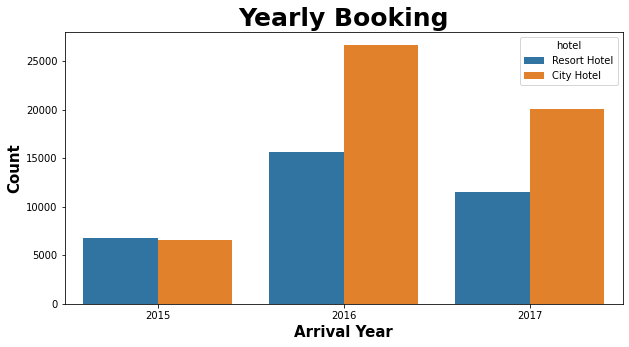

In [47]:

plt.figure(figsize=(10,5))
sns.countplot(data=df1,x='arrival_date_year',hue='hotel')
plt.title('Yearly Booking',weight='bold',fontsize=25)
plt.xlabel('Arrival Year',weight='bold',fontsize=15)
plt.ylabel('Count',weight='bold',fontsize=15)
plt.show()

1.   **Maximum booking was made in 2016.**
2.   **city hotel was mostly booked.**



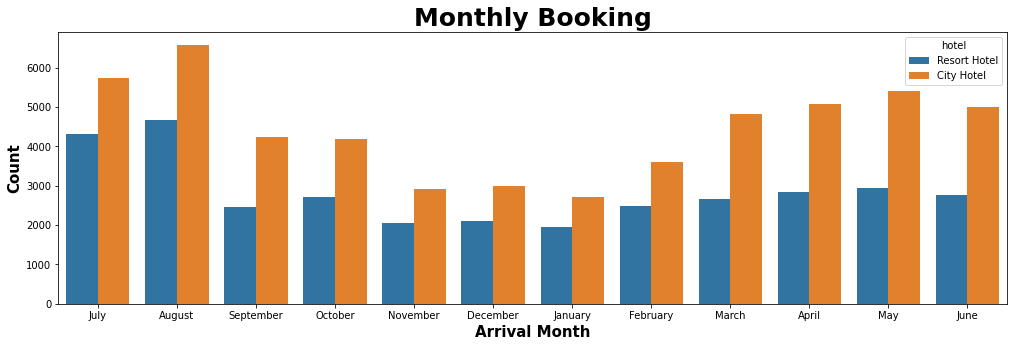

In [48]:
#Lets find the maximum number of booking monthly for both hotels type

plt.figure(figsize=(17,5))
sns.countplot(data=df1,x='arrival_date_month',hue='hotel')
plt.title('Monthly Booking',weight='bold',fontsize=25)
plt.xlabel('Arrival Month',weight='bold',fontsize=15)
plt.ylabel('Count',weight='bold',fontsize=15)
plt.show()


1. **Maximum number of booking was made in August.**  
2. **Most preferable hotel type was City hotel.**



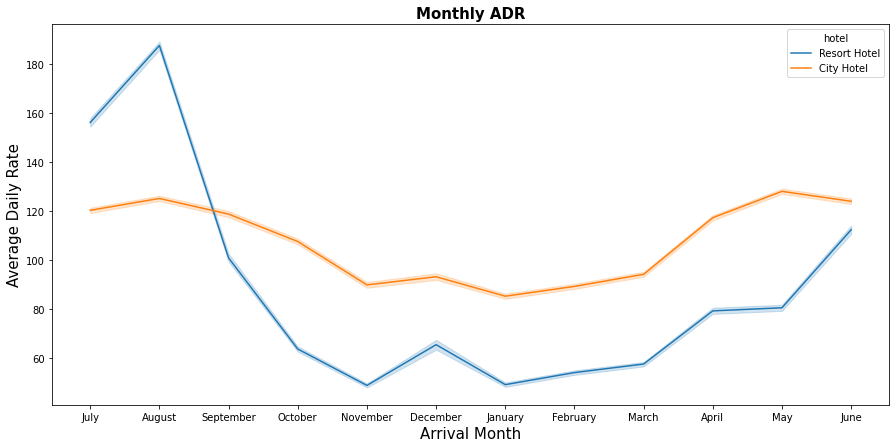

In [49]:
#Lets visualise monthwise adr
plt.figure(figsize=(15,7))
sns.lineplot(data=df1,y='adr',x='arrival_date_month', hue='hotel')
plt.title('Monthly ADR',weight='bold',fontsize=15)
plt.xlabel('Arrival Month',fontsize=15)
plt.ylabel('Average Daily Rate',fontsize=15)
plt.show()



1. **Average daily rate is high in  month of August for both Resort/City hotels because of high deemand of booking in August.**
2. **For Resort hotel lowest adr is in moth of November.**




# 2. **The optimal length of stay in order to get the best daily rate**

Lets compare optimal length of stay with adr and make a visual represetation

In [50]:
#Adding a new column in our dataset
df1['total_num_of_stay']=df1.apply(lambda x:(x['stays_in_weekend_nights']+ x['stays_in_week_nights']), axis=1,result_type='expand')

**Lets check that our new column total_num_of_stay is successfully added to our dataset or not**

In [51]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'total_people_per_booking', 'total_num_of_stay'],
      dtype='object')

In [52]:
df1.iloc[20:25,:]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people_per_booking,total_num_of_stay
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,0,Transient,84.67,0,1,Check-Out,2015-07-07,2.0,6
23,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,0,Transient,99.67,0,1,Check-Out,2015-07-07,2.0,6
24,Resort Hotel,0,127,2015,July,27,1,2,5,2,...,No Deposit,0,Contract,94.95,0,1,Check-Out,2015-07-01,2.0,7
25,Resort Hotel,0,78,2015,July,27,1,2,5,2,...,No Deposit,0,Transient,63.60,1,0,Check-Out,2015-07-08,2.0,7
26,Resort Hotel,0,48,2015,July,27,1,2,5,2,...,No Deposit,0,Contract,79.50,0,0,Check-Out,2015-07-08,2.0,7


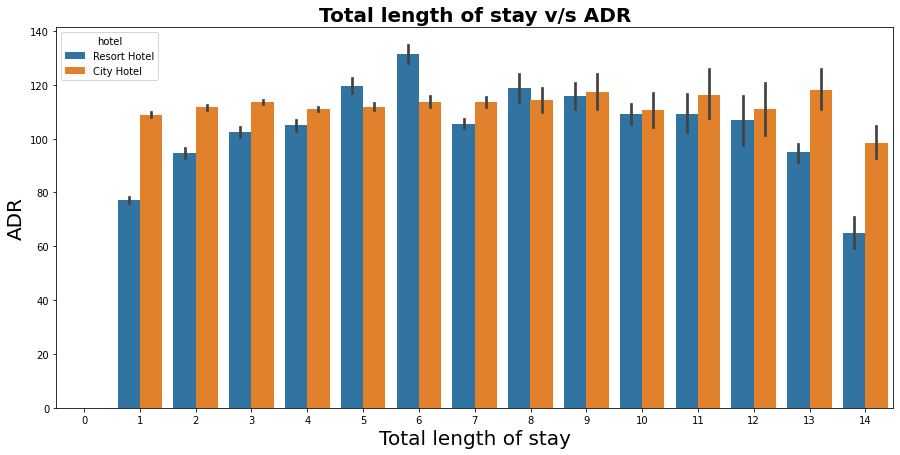

In [53]:
#lets make a barplot to visualize the relationship between total stay vs adr
plt.figure(figsize=(15,7))
sns.barplot(data=df1,y='adr',x='total_num_of_stay',hue='hotel')
plt.title('Total length of stay v/s ADR',weight='bold',fontsize=20)
plt.xlabel('Total length of stay',fontsize=20)
plt.ylabel('ADR',fontsize=20)
plt.show()

**ADR is decreasing with increase in total lengh of stay.**

# 3. Special Request Analysis

Analysing special request made by guest on monthaly basis

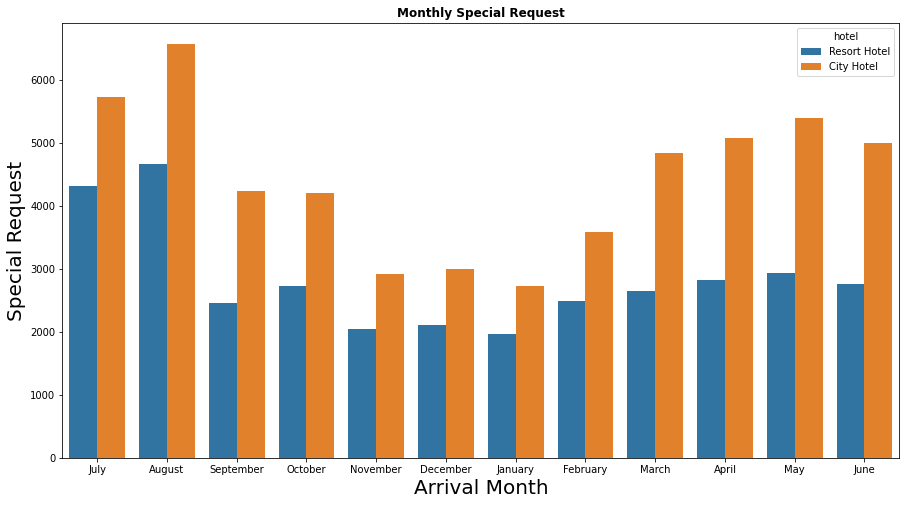

In [54]:
plt.figure(figsize=(15,8))
sns.countplot(data=df1, x='arrival_date_month',hue='hotel')
plt.title('Monthly Special Request',weight='bold')
plt.xlabel('Arrival Month',fontsize=20)
plt.ylabel('Special Request',fontsize=20)
plt.show()

1.  **It seems to be that in almost every month special request was made by guest.**

2. **And as earlier we concluded that in month of August maximum booking was done so maximum special request was also made in this month only.**

# Analysing monthly booking data in different years

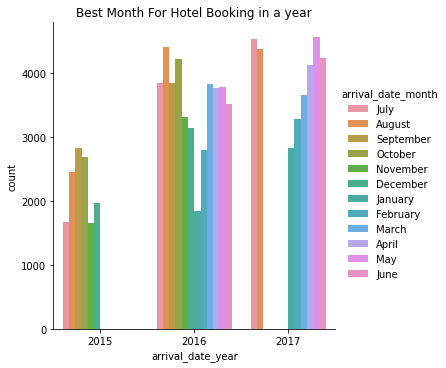

In [55]:
title = 'Best Month For Hotel Booking in a year'
sns.catplot(x='arrival_date_year', kind="count", hue="arrival_date_month", data=df1);
plt.title(title)
plt.ioff()



1.   **In 2015 the most  of the booking was made in month of September**
2.   **In 2016 the most  of the booking was made in month of  August**
3.   **In 2017 the most  of the booking was made in month of  May**



# Most Preferred Hotel Type By Tourists

In [56]:
#lets find most preferrd hotel type
df1['hotel'].value_counts()

City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64

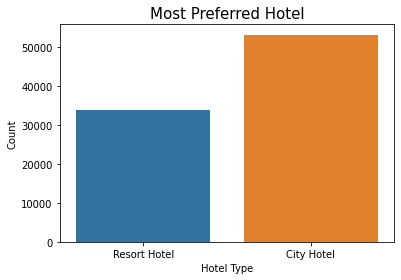

In [57]:
# Visualizing prefeerde hotel type using Count Plot
hotel_count= sns.countplot(x='hotel',data=df1)
hotel_count.set_xlabel('Hotel Type',fontsize = 10)
hotel_count.set_ylabel('Count',fontsize = 10)
hotel_count.set_title('Most Preferred Hotel', fontsize = 15, y = 1)
plt.show()

**City Hotel was mostly preferred by Tourist**

# Lets check the most preferred type of deposit

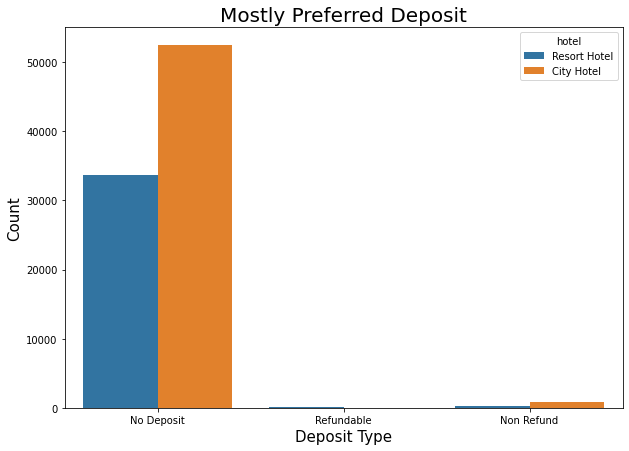

In [58]:
plt.figure(figsize=(10,7))
sns.countplot(data=df1,x='deposit_type',hue='hotel')
plt.xlabel('Deposit Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Mostly Preferred Deposit',fontsize=20)
plt.show()

**No deposit was mostly preferred by guests**

# Let's check that which meal was mostly preferred by guest

In [59]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

Text(0.5, 1.0, 'Most Preferrable Meal')

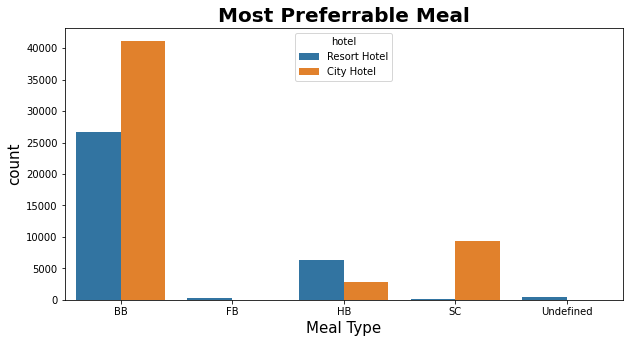

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x='meal',hue='hotel')
plt.xlabel('Meal Type',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Most Preferrable Meal',fontsize=20,weight='bold')

1. **Mostly preferred meal type was BB in both types of Hotel**

# Lets find which hotel is generating the most of revenue. 

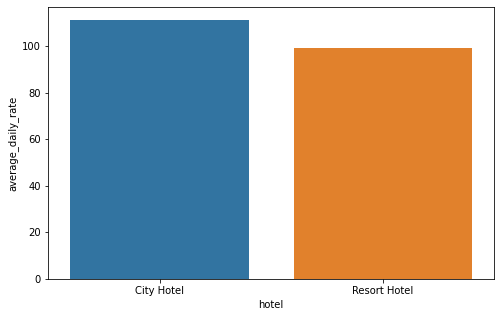

In [61]:
groupby_hotel = df1.groupby("hotel")
average_daily_rate = groupby_hotel["adr"].agg(np.mean).reset_index().rename(columns = {"adr":"average_daily_rate"})
plt.figure(figsize = (8,5))
sns.barplot(x= average_daily_rate["hotel"],y = average_daily_rate["average_daily_rate"])
plt.show()

**AS BOOKING AND AVERAGE DAILY RATE IS MOST IN CITY HOTEL,IT IS GENERATING MOST REVENUE**

# Month in which cancellation rate is high

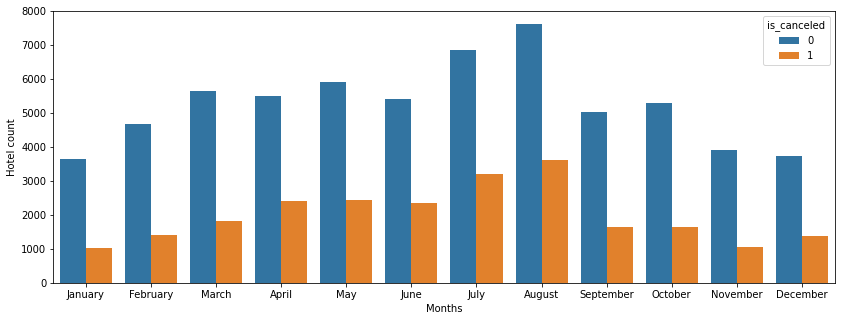

In [62]:
#Visualizing cancellation rate accordance with month using count plot
plt.figure(figsize = (14,5))
month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
sns.countplot(x="arrival_date_month",order = month_order, hue = "is_canceled",data = df1)
plt.xlabel("Months")
plt.ylabel("Hotel count")
plt.show()

**CANCELLATION RATE IS HIGH IN THE MONTH OF AUGUST**

# Reserved room type analysis per year

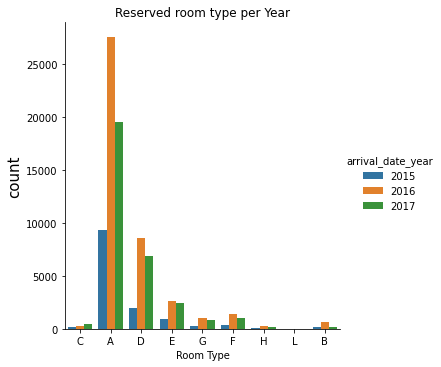

In [63]:
from matplotlib.pylab import Figure
title = 'Reserved room type per Year'
sns.catplot(x='reserved_room_type', kind="count", hue="arrival_date_year", data=df1);
plt.title(title)
plt.xlabel('Room Type',fontsize=10)
plt.ylabel('count',fontsize=15)
plt.ioff()


** A is mostly booked room type every year**

# Let's Check which type of customer made more cancellation in Hotels.

In [64]:
df1['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

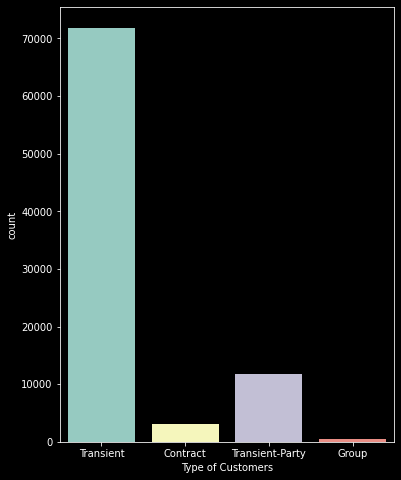

In [65]:
#lets check which type of customer made more booking.
plt.style.use("dark_background")
plt.figure(figsize = (6,8))
sns.countplot(x="customer_type",data=df1)
plt.xlabel("Type of Customers")
plt.show()

**Most of the booking was made by Transient type customer**

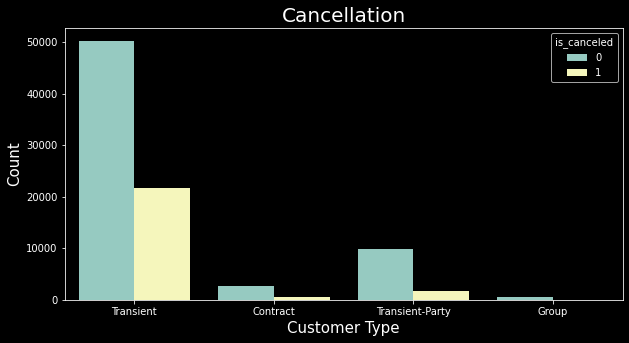

In [66]:
#lets check which type of customer made more cancellation.
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x='customer_type',hue='is_canceled')
plt.title('Cancellation',fontsize=20)
plt.xlabel('Customer Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


**From above representation it is clear that most of the cancellation was made by Transient type of customer**

# Lets check the Guest is repeated guest or not
0=not repeated, 1=repeated

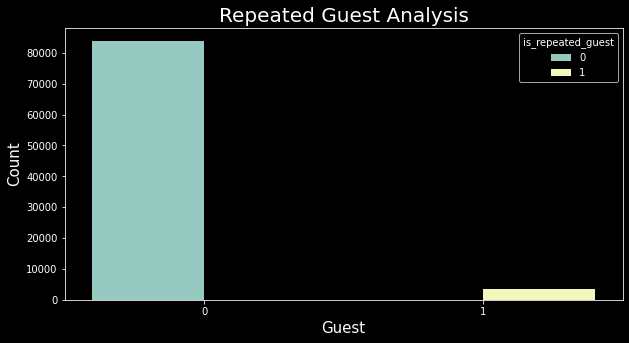

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x='is_repeated_guest',hue='is_repeated_guest')
plt.title('Repeated Guest Analysis',fontsize=20)
plt.xlabel('Guest',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


**So from above representation we come to know that repeated guests are less.**

# TOURISTS PREFER WEEKEND NIGHTS OR WEEK NIGHTS??

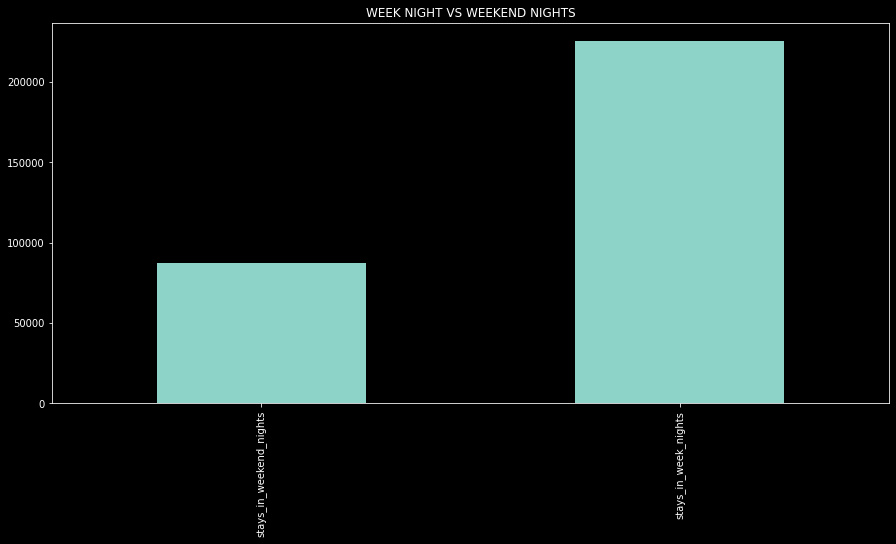

In [68]:
#making dataframe with stays in weekend and stays in week nights
week_or_weekend = pd.DataFrame(df1[['stays_in_weekend_nights', 'stays_in_week_nights']])
x=week_or_weekend .sum()
x.plot(kind = 'bar', figsize = (15,7), title = 'WEEK NIGHT VS WEEKEND NIGHTS')
plt.show()

**SURPRISE!!! TOURISTS LIKES TO BOOK WEEK NIGHTS MORE THAN WEEKEND NIGHTS**

# Lets visualize booking cancellation rate in Hotels
0=booking not canceled, 1=booking canceled 

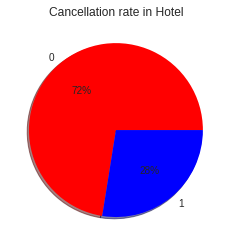

In [69]:
plt.style.use('seaborn-white')
canceled_df=pd.DataFrame(df1['is_canceled'].value_counts().reset_index())
plt.pie(canceled_df['is_canceled'],labels=canceled_df['index'],colors=['red','blue'],autopct='%.0f%%',shadow=True)
plt.title('Cancellation rate in Hotel')
plt.show()

**From above it is understood that most of the booking was not canceled.**

# Lets find the cancellation rate in both of the Hotel

In [70]:
#Lets check this first with City Hotel
city_hotel_cancellation=df1[df1['hotel']=="City Hotel"]['is_canceled'].value_counts()

In [71]:
city_hotel_cancellation

0    37239
1    16035
Name: is_canceled, dtype: int64

**Lets relate it using pie chart**

Text(0.5, 1.0, 'City Hotel')

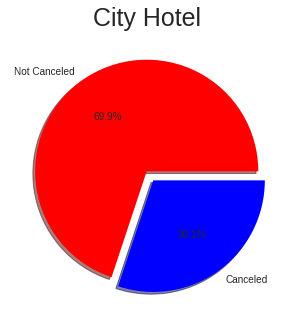

In [72]:
plt.figure(figsize=(17,17))
plt.subplot(1,3,2)
plt.pie(city_hotel_cancellation,labels=["Not Canceled","Canceled"],explode=[0, 0.1],colors=['red','blue'],autopct='%1.1f%%',shadow=True)
plt.title("City Hotel", fontsize=25)

**City Hotel has only 30% chance of booking cancellation.**

Text(0.5, 1.0, 'Resort Hotel')

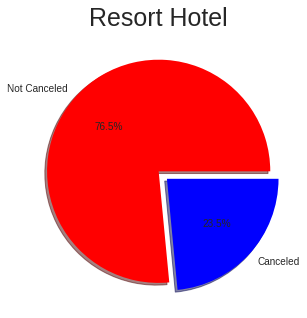

In [73]:
#Lets check the Resort Hotel
plt.figure(figsize=(17,17))
plt.subplot(1,3,2)
plt.pie(df1[df1['hotel']=='Resort Hotel']['is_canceled'].value_counts(),labels=["Not Canceled","Canceled"],explode=[0, 0.1], colors=['red','blue'] ,autopct='%1.1f%%',shadow=True)
plt.title("Resort Hotel", fontsize=25)

**Resort Hotel has only chance 23.5% of booking cancellation which is even less than the City Hotel.**

# Lets check the Impact of required car parking spaces on adr

Text(0, 0.5, 'ADR')

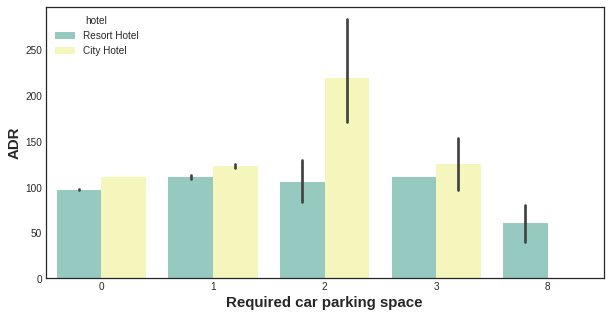

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(data=df1,x='required_car_parking_spaces',y='adr',hue='hotel')
plt.xlabel('Required car parking space',weight='bold',fontsize=15)
plt.ylabel('ADR',weight='bold',fontsize=15)


**Average daily rate(adr) is high when required parking space is equal to two.**

# Lets check from which country maximum booking was made.

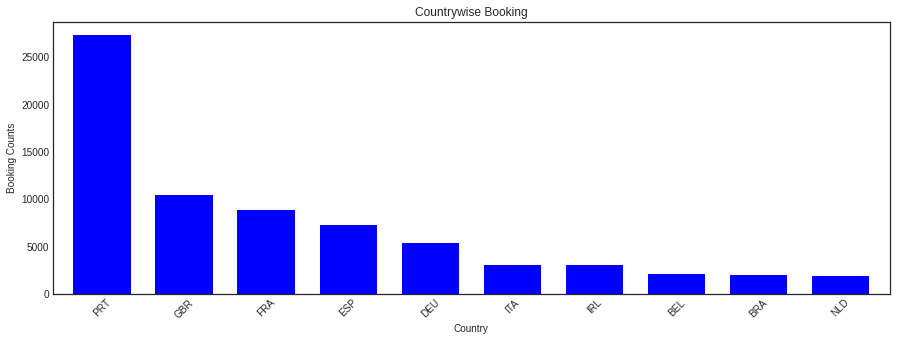

In [75]:
country_df=df1['country'].value_counts()[:10]
country_df.plot(kind='bar',width=.7,color='blue',figsize=(15,5))
plt.xlabel('Country')
plt.ylabel('Booking Counts')
plt.title('Countrywise Booking')
plt.xticks(rotation=45)
plt.show()

**Most of the booking was made from country:PRT(Portugal)**

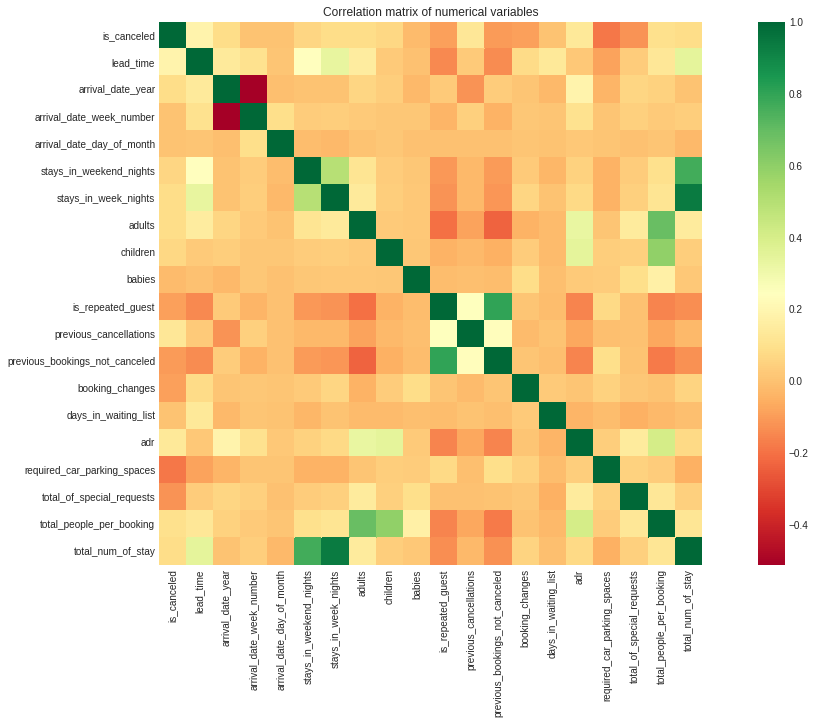

In [76]:
#Correlation
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(df1.corr(), square=True, cmap='RdYlGn')
plt.title(title)
plt.ioff()

# Market segment Analysis 

In [77]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

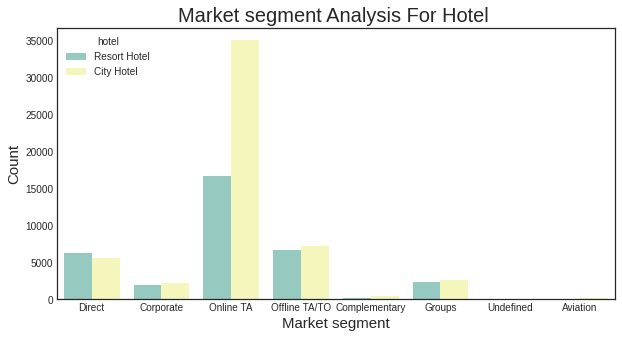

In [78]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x='market_segment',hue='hotel')
plt.title('Market segment Analysis For Hotel ',fontsize=20)
plt.xlabel('Market segment',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

**Online TA was mostly preferred for both hotels**

# We have successfully completed the EDA of our dataset.
**Let's look on the conclusion part**

**Overall Conclusion**


*   We have seen that most of the booking was made in 2016.
*   August was the busiest month.
*   Average daily rate(adr) was high in month of August due to high deemand of booking.
*  ADR is decreasing with increase in total lengh of stay.
*   In almost every months of year special request was made by the guest.
*   City Hotel was mostly preferred by Tourist
*   No deposit was mostly preferred by guests
*  Mostly preferred meal type was BB in both types of Hotel
*  AS BOOKING AND AVERAGE DAILY RATE IS MOST IN CITY HOTEL,IT IS GENERATING MOST REVENUE 
*   As booking is high in month of August,so maximum cancellation was also high in this month.
*   'A' is mostly booked room type every year.
*   Most of the booking as well as cancellation was made by Transient type customer
*   Most of the booking was made by new guests.
*   TOURISTS LIKES TO BOOK WEEK NIGHTS MORE THAN WEEKEND NIGHTS.
*   Most of the booking get confirmed in both type of hotels.
*   Average daily rate(adr) is high when required parking space is equal to two.
*   Portugal cutsomers are dominating in numbers both types of hotel
*   Online TA was mostly preferred for both hotels
*  Corelation is measure of strength of realtion between two variables i.e if there is +ve corelation betweeen two variable then they are strongly corelated for e.g if demand is increasing supply is increasing ,and negative corelation specify just vice versa of later example , in this corelation matrix we have corelation between different coloumns of DataFrame and we can compare the two columns based on thier annoted values. 









